MSE for Batch GD: 0.002528748135479099
MSE for Mini-batch GD: 0.0018788487606554367
MSE for Stochastic GD: 0.0018989188181898166

The best model is Mini-batch with MSE = 0.0018788487606554367


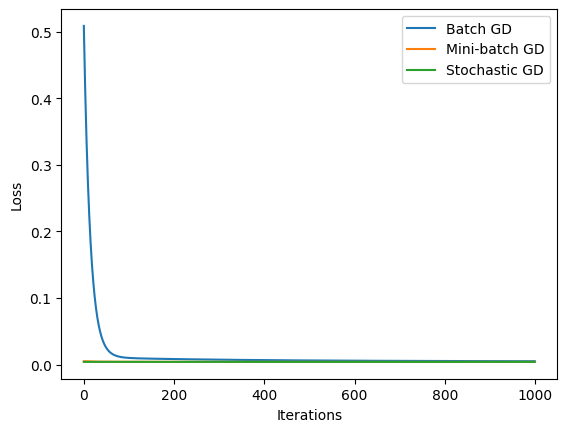

In [ ]:
#MAHIDI HASAN MITHUN
#1930432

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Admission_Predict.csv')
df.drop(['Serial No.'], axis=1, inplace=True)

train_df = df.iloc[:400]
test_df = df.iloc[400:]

X_train = train_df.drop("Chance of Admit ", axis=1).values
y_train = train_df["Chance of Admit "].values
X_test = test_df.drop("Chance of Admit ", axis=1).values
y_test = test_df["Chance of Admit "].values

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

theta = np.zeros(X_train.shape[1])

alpha = 0.01
epochs = 1000

def gradient_descent(X, y, theta, alpha, epochs, batch_size):
    loss_history = []
    for _ in range(epochs):
        for i in range(0, len(y), batch_size):
            X_mini = X[i:i + batch_size]
            y_mini = y[i:i + batch_size]

            prediction = np.dot(X_mini, theta)
            error = prediction - y_mini
            gradient = np.dot(X_mini.T, error) / len(y_mini)
            theta -= alpha * gradient

        loss_history.append(np.mean((y - np.dot(X, theta)) ** 2))
    return theta, loss_history

batch_sizes = {
    "Batch": len(y_train),
    "Mini-batch": 10,
    "Stochastic": 1
}

min_mse = float("inf")
best_model = None

for label, size in batch_sizes.items():
    theta, loss_history = gradient_descent(X_train, y_train, theta, alpha, epochs, size)

    test_prediction = np.dot(X_test, theta)
    test_mse = np.mean((y_test - test_prediction) ** 2)

    if test_mse < min_mse:
        min_mse = test_mse
        best_model = label

    print(f"MSE for {label} GD: {test_mse}")
    plt.plot(range(epochs), loss_history, label=f"{label} GD")

print(f"\nThe best model is {best_model} with MSE = {min_mse}")

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
